# SETTINGS


In [1]:
import torch
import torchvision
from script import *
from visualization import *
from train_and_test import *
from app_6 import *
from app_2 import *
from app_3 import *



In [2]:
BATCH_SIZE = 32
NUM_EPOCHS = 100

# Applying APP6 and creating Train, Validation and Test DataLoaders

len train:  957
len val:  239
len test:  75


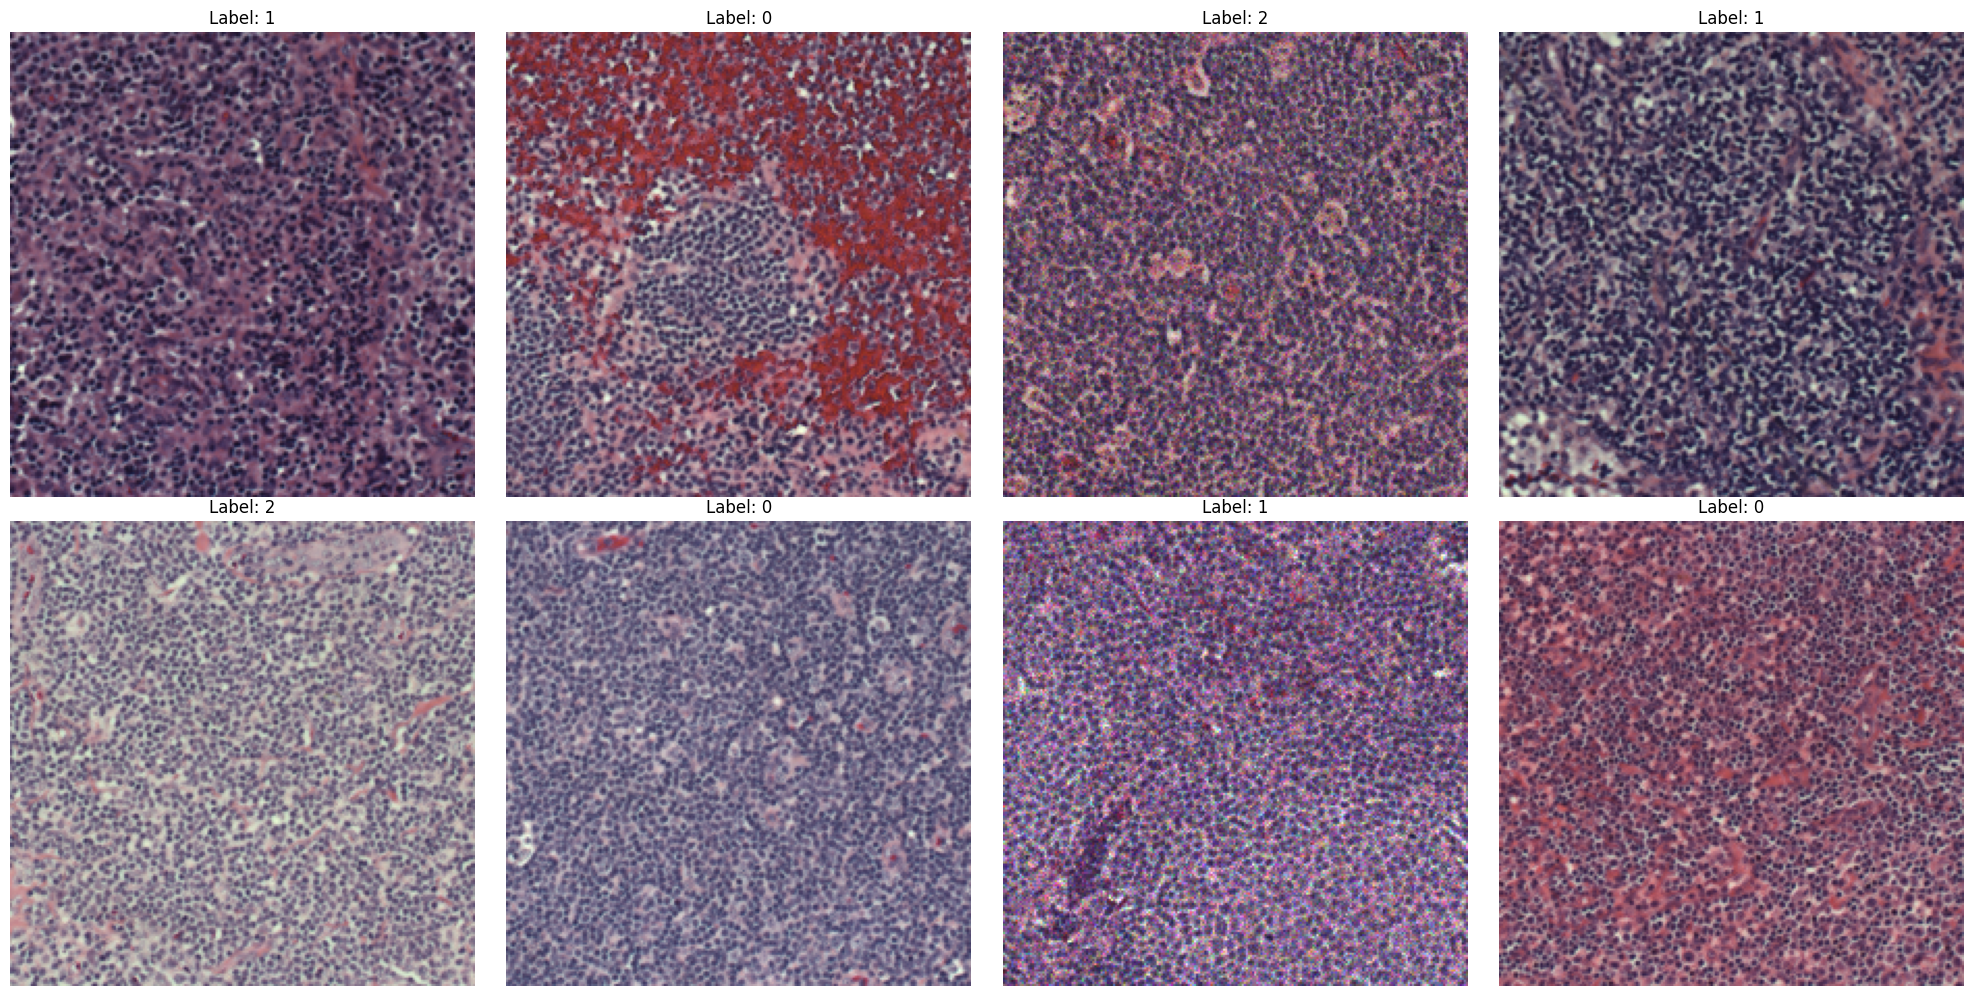

In [3]:

dm = MyDataModule(batch_size=BATCH_SIZE, transform=APP6.APP6, augment=True)
dm.setup()
train_loader = dm.train_dataloader()
test_loader = dm.test_dataloader()
val_loader = dm.val_dataloader()

app_sample_visualizer(train_loader)


# First Model: AlexNet

In [4]:
    Alexnet_model = torchvision.models.alexnet(weights='DEFAULT')
    Alexnet_model.classifier[4] = nn.Linear(4096,1024)

    Alexnet_model.classifier[6] = nn.Linear(1024,3)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 165MB/s]  


# Train and Validation Phase

In [5]:
    tt = Train_Test(NUM_EPOCHS, Alexnet_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/Alexnet_model_app6.pth')
    tt.setup(learning_rate=0.0001)
    train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 1.0552894374669035,--- Validation loss: 0.8130017666138366
Train Accuracy: 43.78%,--- Val Accuracy: 61.09%
--------------------------


Epoch [2/100] - Train loss: 0.8039755389608186,--- Validation loss: 0.786677561793866
Train Accuracy: 58.41%,--- Val Accuracy: 60.25%
--------------------------


Epoch [3/100] - Train loss: 0.7031277398206099,--- Validation loss: 0.5828239324202598
Train Accuracy: 67.82%,--- Val Accuracy: 74.48%
--------------------------


Epoch [4/100] - Train loss: 0.6233399178416253,--- Validation loss: 0.49726904860101484
Train Accuracy: 70.11%,--- Val Accuracy: 79.08%
--------------------------


Epoch [5/100] - Train loss: 0.5014067314012421,--- Validation loss: 0.45099675169050946
Train Accuracy: 76.28%,--- Val Accuracy: 79.08%
--------------------------


Epoch [6/100] - Train loss: 0.4507307669336644,--- Validation loss: 0.5118989445674369
Train Accuracy: 77.74%,--- Val Accuracy: 74.06%
--------------------------


Epoch [7/100] -

# Plotting Result

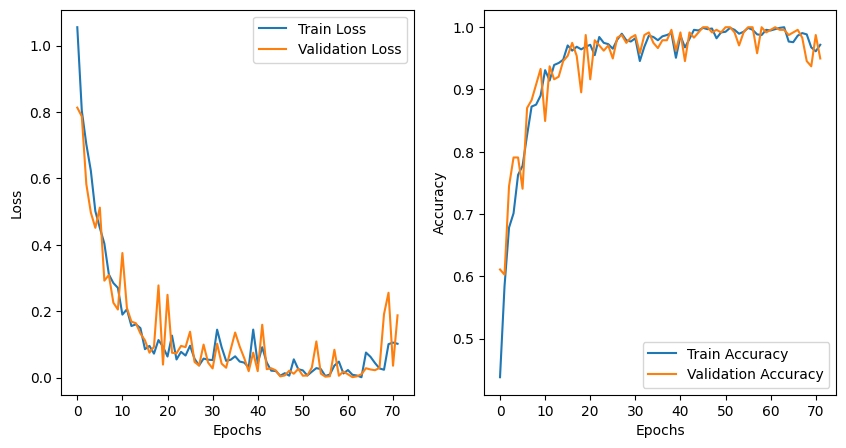

In [6]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [7]:
    tt.test()

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        29
           1       0.81      0.96      0.88        27
           2       0.88      0.74      0.80        19

    accuracy                           0.89        75
   macro avg       0.90      0.88      0.88        75
weighted avg       0.90      0.89      0.89        75

Accuracy of the network on the test images: 89.33 %


# Second Model ResNet-50

In [8]:
resnet50_model = torchvision.models.resnet50(weights='DEFAULT')
resnet50_model.fc = nn.Linear(2048,3)


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 152MB/s]


# Train and Validation Phase

In [9]:
tt = Train_Test(NUM_EPOCHS, resnet50_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/ResNet50_model_app6.pth')
tt.setup(learning_rate=0.0001)
train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 0.9662078746683047,--- Validation loss: 1.1352707990542614
Train Accuracy: 56.74%,--- Val Accuracy: 36.82%
--------------------------


Epoch [2/100] - Train loss: 0.5796144339981,--- Validation loss: 0.39363020334283677
Train Accuracy: 80.88%,--- Val Accuracy: 88.28%
--------------------------


Epoch [3/100] - Train loss: 0.30188058847668525,--- Validation loss: 0.1735238935408732
Train Accuracy: 89.55%,--- Val Accuracy: 94.56%
--------------------------


Epoch [4/100] - Train loss: 0.19735846342275634,--- Validation loss: 0.11579509777753423
Train Accuracy: 92.69%,--- Val Accuracy: 96.65%
--------------------------


Epoch [5/100] - Train loss: 0.15852553845853268,--- Validation loss: 0.1021058590591702
Train Accuracy: 94.36%,--- Val Accuracy: 97.49%
--------------------------


Epoch [6/100] - Train loss: 0.12023638750162742,--- Validation loss: 0.0737090281300465
Train Accuracy: 96.55%,--- Val Accuracy: 97.49%
--------------------------


Epoch [7/100]

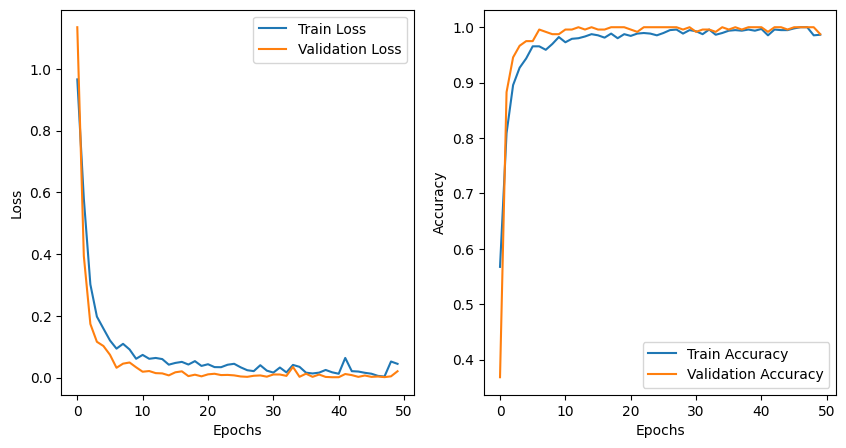

In [10]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [11]:
tt.test()


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       1.00      0.96      0.98        27
           2       0.90      1.00      0.95        19

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.97        75
weighted avg       0.98      0.97      0.97        75

Accuracy of the network on the test images: 97.33 %


# Third Model: DenseNet-121

In [12]:
densenet121_model = torchvision.models.densenet121(weights='DEFAULT')
densenet121_model.classifier = nn.Linear(1024, 3)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 150MB/s]


# Train and Validation Phase

In [13]:
tt = Train_Test(NUM_EPOCHS, densenet121_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/DenseNet121_model_app6.pth')
tt.setup(learning_rate=0.0001)
train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 0.7449182444480769,--- Validation loss: 0.9124185425467072
Train Accuracy: 67.19%,--- Val Accuracy: 56.90%
--------------------------


Epoch [2/100] - Train loss: 0.32543423890195544,--- Validation loss: 0.2069463541567575
Train Accuracy: 89.34%,--- Val Accuracy: 94.14%
--------------------------


Epoch [3/100] - Train loss: 0.17499834328671857,--- Validation loss: 0.1037308153497624
Train Accuracy: 94.88%,--- Val Accuracy: 97.49%
--------------------------


Epoch [4/100] - Train loss: 0.11566953720717595,--- Validation loss: 0.064358559238362
Train Accuracy: 96.66%,--- Val Accuracy: 98.33%
--------------------------


Epoch [5/100] - Train loss: 0.08282219577296525,--- Validation loss: 0.0685290476798263
Train Accuracy: 97.91%,--- Val Accuracy: 97.07%
--------------------------


Epoch [6/100] - Train loss: 0.07641960140570703,--- Validation loss: 0.0224284303674638
Train Accuracy: 98.01%,--- Val Accuracy: 100.00%
--------------------------


Epoch [7/10

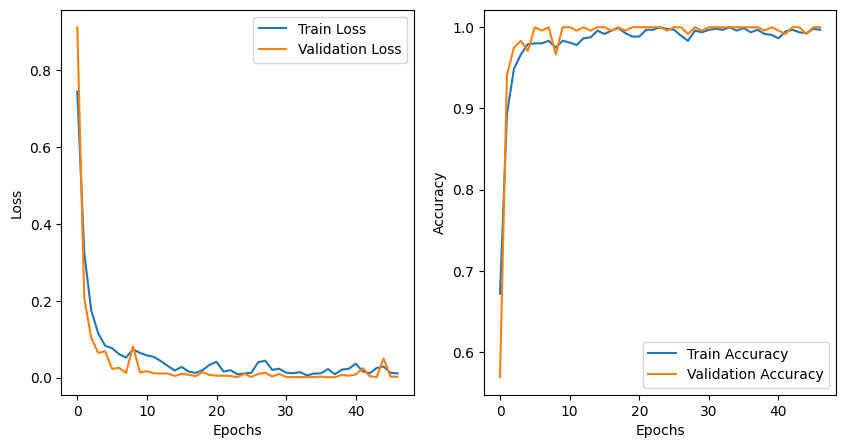

In [14]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [15]:
tt.test()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      0.96      0.98        27
           2       0.95      1.00      0.97        19

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

Accuracy of the network on the test images: 98.67 %
